# Prosper Loan Data Analysis
## by Dhanya Sreekumar

## Investigation Overview

> To analyze the Prosper Loan data and find some insights and present them using visualizations.

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


Bad key "text.dvipnghack" on line 127 in
/home/dhanya/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "nbagg.transparent" on line 433 in
/home/dhanya/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_path" on line 516 in
/home/dhanya/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_a

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('/home/dhanya/Downloads/prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Number of Borrowers by income range

> This plot shows the number of borrowers for each income range.

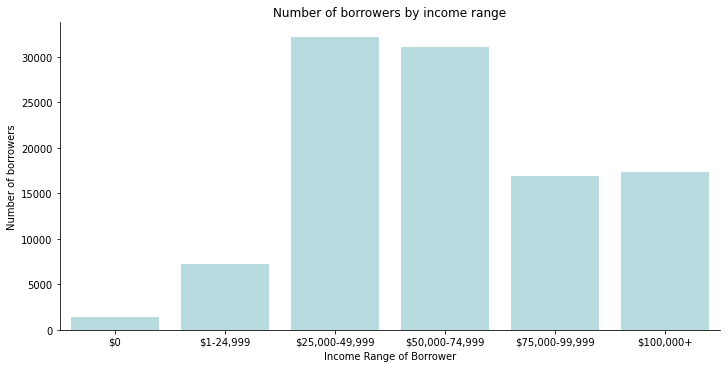

In [3]:
df.IncomeRange = df.IncomeRange.replace('Not employed', '$0')
order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
sb.catplot(data = df[df.IncomeRange != 'Not displayed'], x = 'IncomeRange', kind = 'count', height = 5, aspect = 10/5, color = 'powderblue', order = order)
plt.xlabel('Income Range of Borrower')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers by income range')
plt.show()

* We can see that most borrowers are in the 25,000 - 49,999 income range.

## Borrower Rate by Income Range

> The plot shows the borrower interest rate for various income ranges

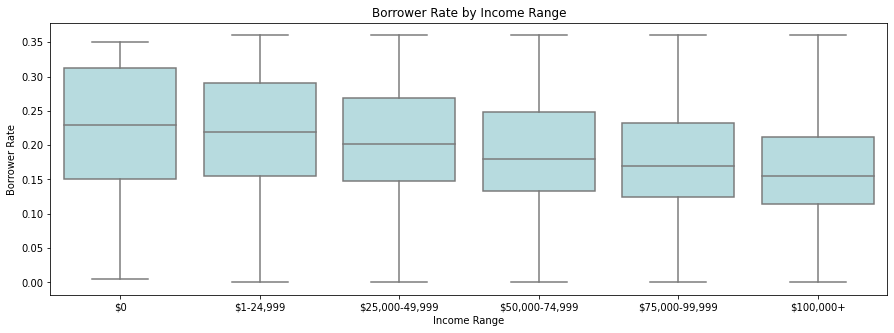

In [4]:
df.IncomeRange = df.IncomeRange[df.IncomeRange != 'Not displayed']
order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
plt.figure(figsize = (15,5))
sb.boxplot(data=df, x='IncomeRange', y='BorrowerRate', order = order, color = 'powderblue')
plt.xlabel('Income Range')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate by Income Range')
plt.show()

* We can see that higher rates are paid by lower income groups.

## Borrower Rate by Loan Status for different income groups

> This plot shows the borrower rates by different loan statuses for the various income ranges.


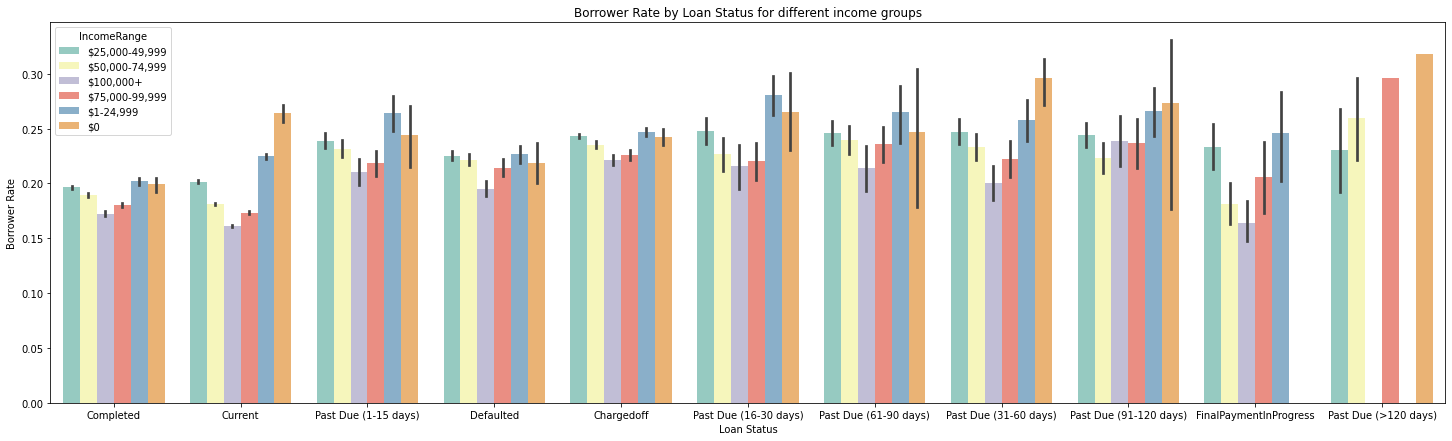

In [5]:
df['LoanStatus'] = df.LoanStatus[df.LoanStatus != 'Cancelled']
plt.figure(figsize = (25,7))
sb.barplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'IncomeRange', palette = 'Set3')
plt.xlabel('Loan Status')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate by Loan Status for different income groups')
plt.show()

* An important insight we get from this graph is that the interest rate generally increases as more days past the due date for loan payment. We also see that the loer income groups are the ones who pay the highest interest rate. This can be because that since lower income groups are the most likely to delay payment hence the loan passes due date, the have to pay higher interest rates.